In [1]:
import csv
from faker import Faker
import random
from datetime import datetime, timedelta

# Initialize Faker object
fake = Faker()

# Define the field names
fieldnames = [
    'order_id', 'customer_id', 'customer_name', 'product_id', 'product_name', 
    'product_category', 'payment_type', 'qty', 'price', 'datetime', 'country', 
    'city', 'ecommerce_website_name', 'payment_txn_id', 'payment_txn_success', 'failure_reason'
]

# Helper function to generate a random date within a given range
def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())),
    )

# Predefined list of products with their correct categories
product_categories = {
    'Stationery': ['Pen', 'Pencil', 'Notebook', 'Eraser', 'Marker', 'Stapler', 'Highlighter', 'Ruler', 'Glue Stick'],
    'Electronics': ['Laptop', 'Headphones', 'Smartphone', 'Camera', 'Tablet', 'Smartwatch', 'Bluetooth Speaker', 'Router', 'Monitor'],
    'Books': ['Book', 'Comics', 'Thriller Story', 'Science Fiction', 'Biography', 'Self-Help', 'Cookbook', 'Travel Guide', 'Children\'s Book'],
    'Clothing': ['Shirt', 'Pants', 'Jeans', 'Trouser', 'Jacket', 'T-shirt', 'Dress', 'Skirt', 'Sweater'],
    'Accessories': ['Backpack', 'Water Bottle', 'Desk Lamp', 'Calculator', 'Watch', 'Sunglasses', 'Wallet', 'Belt', 'Scarf'],
}

# Flatten the product list for random selection while keeping track of categories
all_products = [(product, category) for category, products in product_categories.items() for product in products]

def generate_random_data():
    # Predefined payment types and other attributes
    payment_types = ['Card', 'Internet Banking', 'UPI', 'Wallet']
    ecommerce_sites = ['www.amazon.com', 'www.flipkart.com', 'www.tatacliq.com', 'www.ebay.in']
    payment_status = ['Y', 'N']
    failure_reasons = ['Invalid CVV', 'Insufficient funds', 'Card expired', '']

    # Predefined countries and cities
    countries_cities = {
        'USA': ['New York', 'Los Angeles', 'Chicago'],
        'India': ['Mumbai', 'Chennai', 'Bangalore'],
        'UK': ['London', 'Manchester', 'Birmingham'],
        'Australia': ['Sydney', 'Melbourne', 'Brisbane'],
        'South Africa': ['Johannesburg', 'Cape Town', 'Durban']
    }

    data = []
    for i in range(1, 10001):  # Generating 10,000+ records
        # Select a random country and city
        country = random.choice(list(countries_cities.keys()))
        city = random.choice(countries_cities[country])

        # Select a random product and its corresponding category
        product_name, product_category = random.choice(all_products)

        payment_txn_success = random.choice(payment_status)
        customer_name = fake.name()
        record = {
            'order_id': i,
            'customer_id': random.randint(100, 999),
            'customer_name': customer_name,
            'product_id': random.randint(200, 999),
            'product_name': product_name,
            'product_category': product_category,
            'payment_type': random.choice(payment_types),
            'qty': random.randint(1, 20),
            'price': round(random.uniform(5, 5000), 2),  # Rounding to 2 decimal places
            'datetime': random_date(datetime(2021, 1, 1), datetime(2023, 12, 31)).strftime('%Y-%m-%d %H:%M'),
            'country': country,
            'city': city,
            'ecommerce_website_name': random.choice(ecommerce_sites),
            'payment_txn_id': random.randint(10000, 99999),
            'payment_txn_success': payment_txn_success,
            'failure_reason': random.choice(failure_reasons if payment_txn_success == 'N' else [''])
        }
        data.append(record)
    return data

# Generate the data
data = generate_random_data()


In [2]:
# Writing the data to a CSV file with UTF-8 encoding
with open('ecommerce_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)

print("CSV file 'ecommerce_data.csv' created successfully with 10,000+ records.")


CSV file 'ecommerce_data.csv' created successfully with 10,000+ records.


In [3]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('ecommerce_data.csv')

# Display the first few rows of the DataFrame to verify the content
print(df.head())


   order_id  customer_id     customer_name  product_id  product_name  \
0         1          307  David Richardson         307  Travel Guide   
1         2          194    Willie Burgess         640        Wallet   
2         3          358        Tami White         328        Pencil   
3         4          718        Tara Fritz         648        Wallet   
4         5          724    Danielle Jones         814       Trouser   

  product_category      payment_type  qty    price          datetime  \
0            Books  Internet Banking   12  3610.08  2021-03-18 10:41   
1      Accessories              Card    5  2396.03  2022-06-16 14:00   
2       Stationery              Card    2  3728.01  2023-01-20 22:56   
3      Accessories              Card    9  2126.55  2021-01-09 22:41   
4         Clothing  Internet Banking    9   469.90  2023-02-09 02:23   

     country        city ecommerce_website_name  payment_txn_id  \
0         UK  Birmingham       www.flipkart.com           31025   


In [4]:
#viewing first few rows of the dataframe with clear structure
df.head()

,order_id,customer_id,customer_name,product_id,product_name,product_category,payment_type,qty,price,datetime,country,city,ecommerce_website_name,payment_txn_id,payment_txn_success,failure_reason
0,1,307,David Richardson,307,Travel Guide,Books,Internet Banking,12,3610.08,2021-03-18 10:41,UK,Birmingham,www.flipkart.com,31025,N,Card expired
1,2,194,Willie Burgess,640,Wallet,Accessories,Card,5,2396.03,2022-06-16 14:00,India,Mumbai,www.amazon.com,16927,Y,NaN
2,3,358,Tami White,328,Pencil,Stationery,Card,2,3728.01,2023-01-20 22:56,India,Mumbai,www.flipkart.com,40231,Y,NaN
3,4,718,Tara Fritz,648,Wallet,Accessories,Card,9,2126.55,2021-01-09 22:41,Australia,Melbourne,www.ebay.in,72731,N,NaN
4,5,724,Danielle Jones,814,Trouser,Clothing,Internet Banking,9,469.90,2023-02-09 02:23,USA,Chicago,www.ebay.in,36087,N,Card expired


In [5]:
# Count the number of non-null entries in each column
print(df.count())

order_id                  10000
customer_id               10000
customer_name             10000
product_id                10000
product_name              10000
product_category          10000
payment_type              10000
qty                       10000
price                     10000
datetime                  10000
country                   10000
city                      10000
ecommerce_website_name    10000
payment_txn_id            10000
payment_txn_success       10000
failure_reason             3675
dtype: int64


In [6]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Display the number of missing values per column
print(missing_values)

order_id                     0
customer_id                  0
customer_name                0
product_id                   0
product_name                 0
product_category             0
payment_type                 0
qty                          0
price                        0
datetime                     0
country                      0
city                         0
ecommerce_website_name       0
payment_txn_id               0
payment_txn_success          0
failure_reason            6325
dtype: int64


In [9]:
# Fill missing values in the 'failure_reason' column with a specific value
df['failure_reason'].fillna('Details not found', inplace=True)

# Verify that there are no more missing values
missing_values_after_filling = df.isna().sum()

print(missing_values_after_filling)


order_id                  0
customer_id               0
customer_name             0
product_id                0
product_name              0
product_category          0
payment_type              0
qty                       0
price                     0
datetime                  0
country                   0
city                      0
ecommerce_website_name    0
payment_txn_id            0
payment_txn_success       0
failure_reason            0
dtype: int64


In [11]:
# Save the updated DataFrame back to the CSV file
df.to_csv('ecommerce_data.csv', index=False)

# Confirm that the CSV file has been updated successfully
print("CSV file 'ecommerce_data.csv' has been updated with filled missing values.")

CSV file 'ecommerce_data.csv' has been updated with filled missing values.


In [31]:
# Checking whether there is duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate records:", duplicates)

# Remove duplicates
df.drop_duplicates(inplace=True)

Number of duplicate records: 0


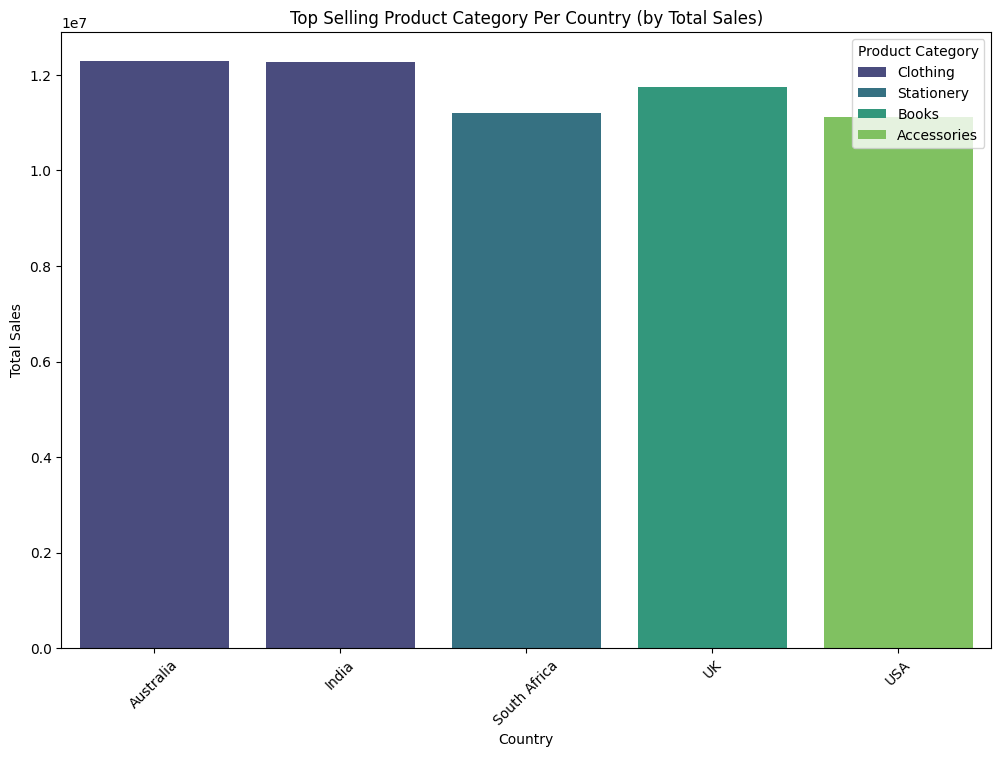

In [11]:

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('ecommerce_data.csv')

# Ensure 'price' and 'qty' are numeric for accurate calculations
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')

# Step 1: Calculate total sales (price * qty) for each row
df['total_sales'] = df['price'] * df['qty']

# Step 2: Aggregate data to calculate total sales per product category per country
total_sales_per_category_country = df.groupby(['country', 'product_category'])['total_sales'].sum().reset_index()

# Step 3: Find the top-selling category per country by sales
top_selling_per_country = total_sales_per_category_country.loc[
    total_sales_per_category_country.groupby('country')['total_sales'].idxmax()
]

# Step 4: Plot the top-selling category per country based on total sales
plt.figure(figsize=(12, 8))
sns.barplot(data=top_selling_per_country, x='country', y='total_sales', hue='product_category', palette='viridis')
plt.title('Top Selling Product Category Per Country (by Total Sales)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Product Category')
plt.show()


In [12]:
# Ensure the 'Price' and 'qty' columns are numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')

# Step 1: Calculate total sales (price * qty) for each row
df['total_sales'] = df['price'] * df['qty']

# Step 2: Group by 'Country' and 'Product Category', and sum the 'total_sales'
country_category_sales = df.groupby(['country', 'product_category'])['total_sales'].sum().reset_index()

# Step 3: Find the top-selling category per country
top_categories = country_category_sales.loc[country_category_sales.groupby('country')['total_sales'].idxmax()]

# Step 4: Sort the results in descending order of 'total_sales'
top_categories_sorted = top_categories.sort_values(by='total_sales', ascending=False)

# Display the sorted results
print(top_categories_sorted)


         country product_category  total_sales
2      Australia         Clothing  12283213.16
7          India         Clothing  12272318.33
16            UK            Books  11737903.56
14  South Africa       Stationery  11200263.63
20           USA      Accessories  11126971.71


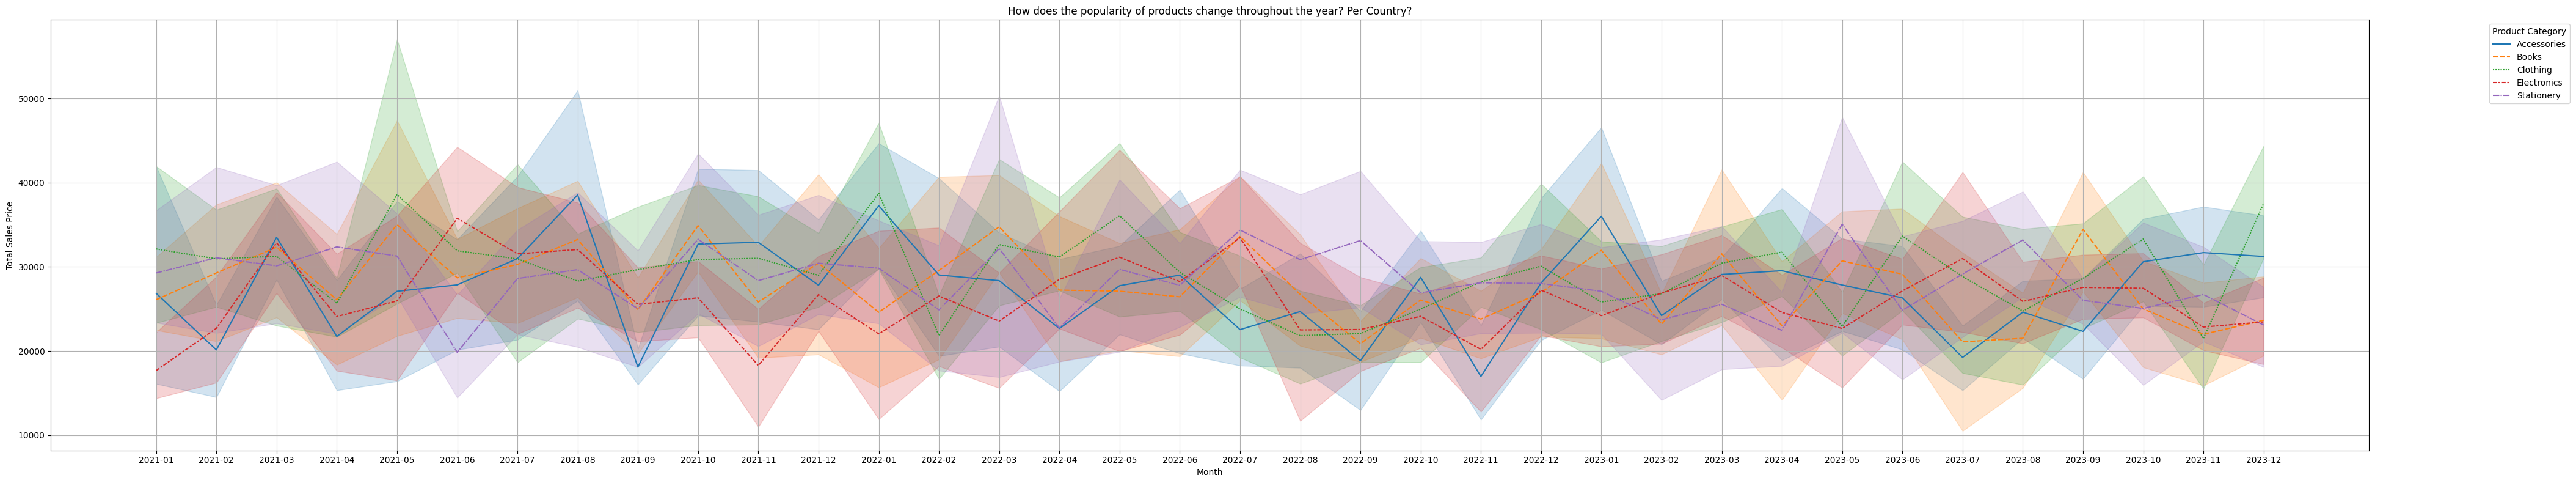

In [9]:
# Ensure 'price' is numeric for accurate calculations
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Ensure 'datetime' is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Drop rows with missing 'datetime' or 'price'
df.dropna(subset=['datetime', 'price'], inplace=True)

# Extract month and year from the datetime column
df['Month'] = df['datetime'].dt.to_period('M').astype(str)  # Convert to string format for plotting

# Aggregate data to calculate total sales per product per month per country
monthly_sales = df.groupby(['Month', 'country', 'product_category'])['price'].sum().reset_index()

# Step 1: Plot the trends
plt.figure(figsize=(42, 8))

# Plot the data for all countries at once
sns.lineplot(data=monthly_sales, x='Month', y='price', hue='product_category', style='product_category')

plt.title('How does the popularity of products change throughout the year? Per Country?')
plt.xlabel('Month')
plt.ylabel('Total Sales Price')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
'''3. Which locations see the highest traffic of sales?'''
# Ensure 'price' is numeric for accurate calculations
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing 'price'
df.dropna(subset=['price'], inplace=True)

# Aggregate data to calculate total sales per country and city
sales_by_location = df.groupby(['country', 'city'])['price'].sum().reset_index()

# Sort the results to find the highest traffic of sales
top_locations = sales_by_location.sort_values(by='price', ascending=False)

print(top_locations.head(10))  # Print top 10 locations with the highest sales


         country         city       price
4          India      Chennai  1774709.03
9             UK   Birmingham  1756362.84
11            UK   Manchester  1738644.77
7   South Africa       Durban  1690166.95
3          India    Bangalore  1679449.38
2      Australia       Sydney  1679136.23
13           USA  Los Angeles  1671549.88
10            UK       London  1669788.56
14           USA     New York  1664048.35
0      Australia     Brisbane  1654036.69


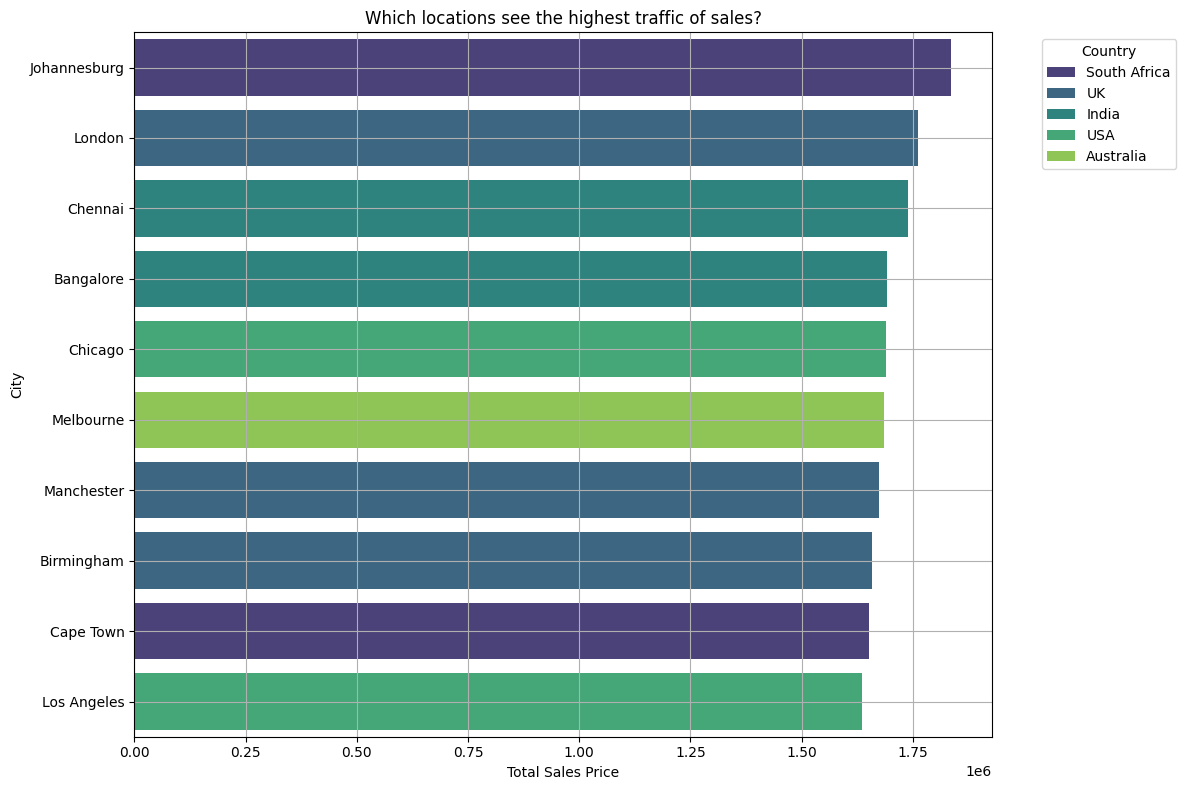

In [10]:
'''3. Which locations see the highest traffic of sales?'''
# Ensuring that 'price' is numeric for accurate calculations
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Droping the rows with missing 'price' values
df.dropna(subset=['price'], inplace=True)

# Aggregating the data to calculate total sales per country and city
sales_by_location = df.groupby(['country', 'city'])['price'].sum().reset_index()

# Sorting the results to find out the highest traffic of sales
top_locations = sales_by_location.sort_values(by='price', ascending=False)

# Here we are defining top N locations for visualization
top_n = 10
top_locations = top_locations.head(top_n)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_locations, x='price', y='city', hue='country', palette='viridis')

plt.title('Which locations see the highest traffic of sales?')
plt.xlabel('Total Sales Price')
plt.ylabel('City')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


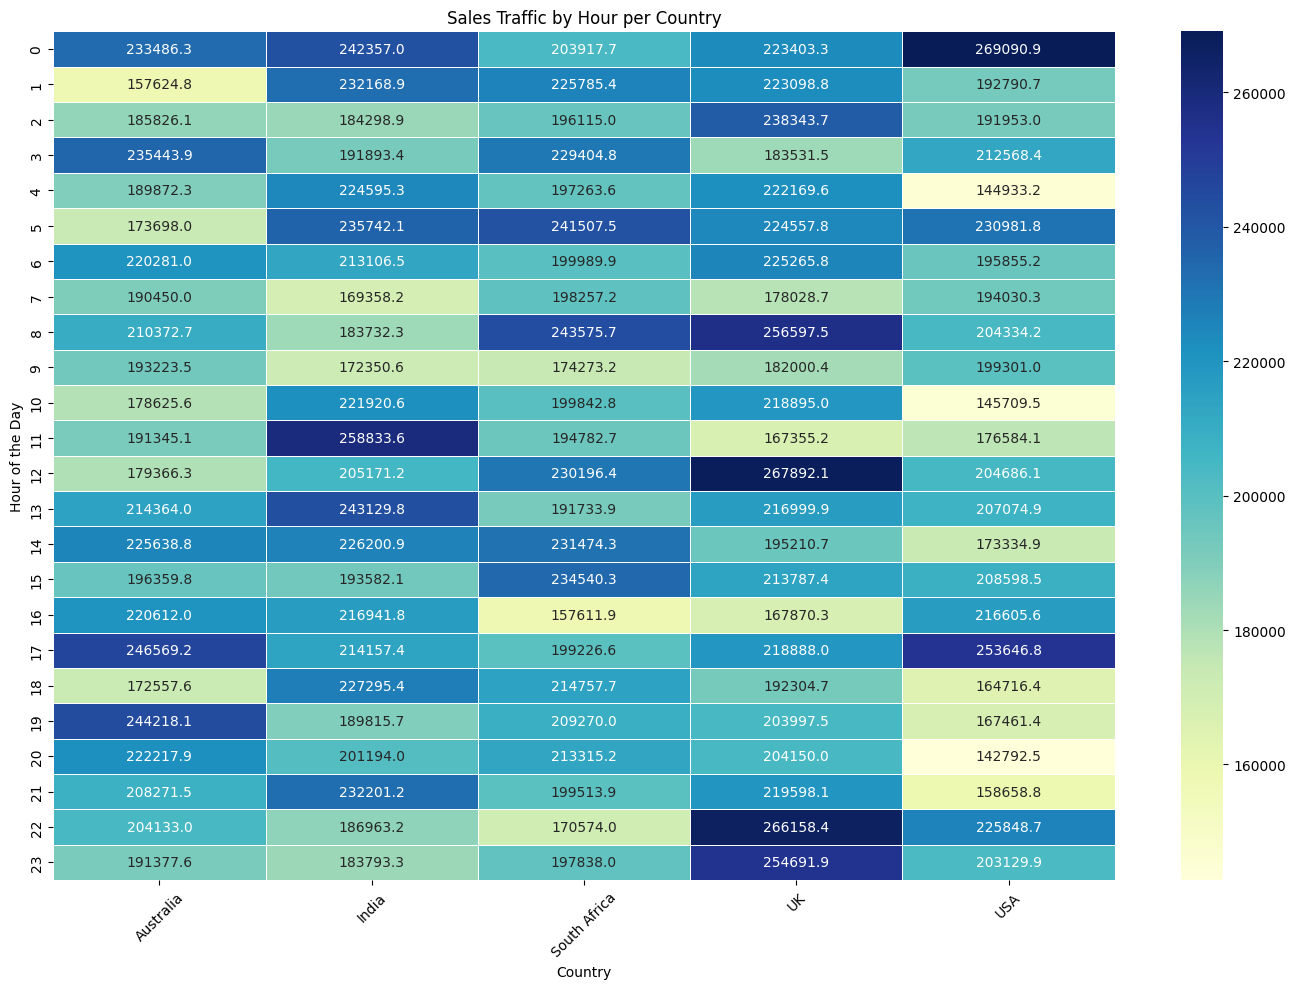

In [49]:
'''What times have the highest traffic of sales? Per Country?'''
# Ensure 'price' is numeric for accurate calculations
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Ensure 'datetime' is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Drop rows with missing 'datetime' or 'price'
df.dropna(subset=['datetime', 'price'], inplace=True)

# Extract hour from the datetime column
df['hour'] = df['datetime'].dt.hour

# Aggregate data to calculate total sales per hour per country
hourly_sales = df.groupby(['country', 'hour'])['price'].sum().reset_index()

# Pivot the data for the heatmap
heatmap_data = hourly_sales.pivot_table(index='hour', columns='country', values='price', fill_value=0)

# Create a heatmap of sales traffic by hour per country
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.5)
plt.title('Sales Traffic by Hour per Country')
plt.xlabel('Country')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
